In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import os


current_dir = os.getcwd()
subdirectory = 'data'
data_dir = os.path.join(current_dir, subdirectory)

image_size = (224, 224)
num_classes = 13
test_size = 0.2
batch_size = 32
epochs = 10


In [ ]:
# Data augmentation and preprocessing
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=test_size)

In [ ]:
# Load and split the data
train_data = data_gen.flow_from_directory(
    directory=data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

test_data = data_gen.flow_from_directory(
    directory=data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 1040 images belonging to 13 classes.
Found 260 images belonging to 13 classes.


In [ ]:
# Build a simple CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_data, epochs=epochs, validation_data=test_data)



Epoch 1/10
33/33 [==============================] - 52s 2s/step - loss: 3.4514 - accuracy: 0.0846 - val_loss: 2.5623 - val_accuracy: 0.0769
Epoch 2/10
33/33 [==============================] - 46s 1s/step - loss: 2.5397 - accuracy: 0.0856 - val_loss: 2.4986 - val_accuracy: 0.0846
Epoch 3/10
33/33 [==============================] - 45s 1s/step - loss: 2.4287 - accuracy: 0.1615 - val_loss: 2.4041 - val_accuracy: 0.1269
Epoch 4/10
33/33 [==============================] - 45s 1s/step - loss: 2.2342 - accuracy: 0.2250 - val_loss: 2.3001 - val_accuracy: 0.1692
Epoch 5/10
33/33 [==============================] - 46s 1s/step - loss: 2.0948 - accuracy: 0.2663 - val_loss: 2.0710 - val_accuracy: 0.2500
Epoch 6/10
33/33 [==============================] - 45s 1s/step - loss: 1.9662 - accuracy: 0.3125 - val_loss: 1.9737 - val_accuracy: 0.2846
Epoch 7/10
33/33 [==============================] - 44s 1s/step - loss: 1.8508 - accuracy: 0.3394 - val_loss: 1.8330 - val_accuracy: 0.3577
Epoch 8/10
33/33 [==

In [ ]:
# Calculate confusion matrix on the test set
true_labels = test_data.classes
predicted_labels = np.argmax(model.predict(test_data), axis=1)
confusion_mat = confusion_matrix(true_labels, predicted_labels)


9/9 [==============================] - 6s 599ms/step


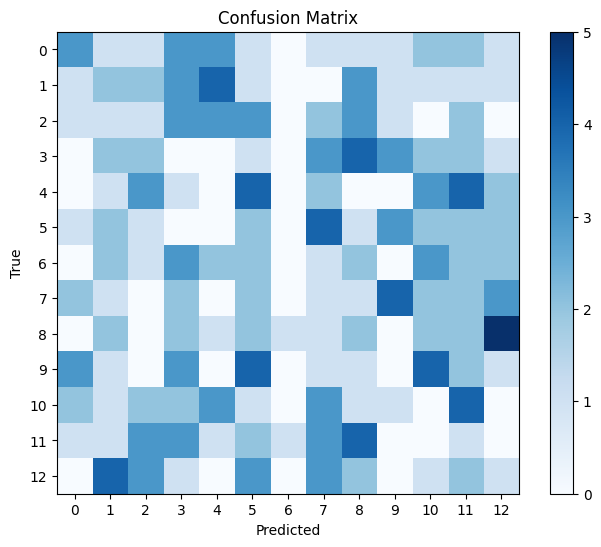

In [ ]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, range(num_classes))
plt.yticks(tick_marks, range(num_classes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()